# **Classify the Emails into Spam or Not.**

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [ ]:
df = pd.read_csv('/content/spam_or_not_spam.csv')
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
3460,abc s good morning america ranks it the NUMBE...,1
3461,hyperlink hyperlink hyperlink let mortgage le...,1
3462,thank you for shopping with us gifts for all ...,1
3463,the famous ebay marketing e course learn to s...,1


# Understanding the Data

In [ ]:
df.dtypes

email    object
label     int64
dtype: object

In [ ]:
df.shape

(3465, 2)

In [ ]:
df.size

6930

In [ ]:
df.columns

Index(['email', 'label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3465 entries, 0 to 3464
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   3463 non-null   object
 1   label   3465 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 54.3+ KB


In [ ]:
df.describe()

,label
count,3465.000000
mean,0.278499
std,0.448325
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df.corr()

,label
label,1.0


In [ ]:
df.nunique()

email    2873
label       2
dtype: int64

In [ ]:
df.isnull().any()

email     True
label    False
dtype: bool

# Data Visualization

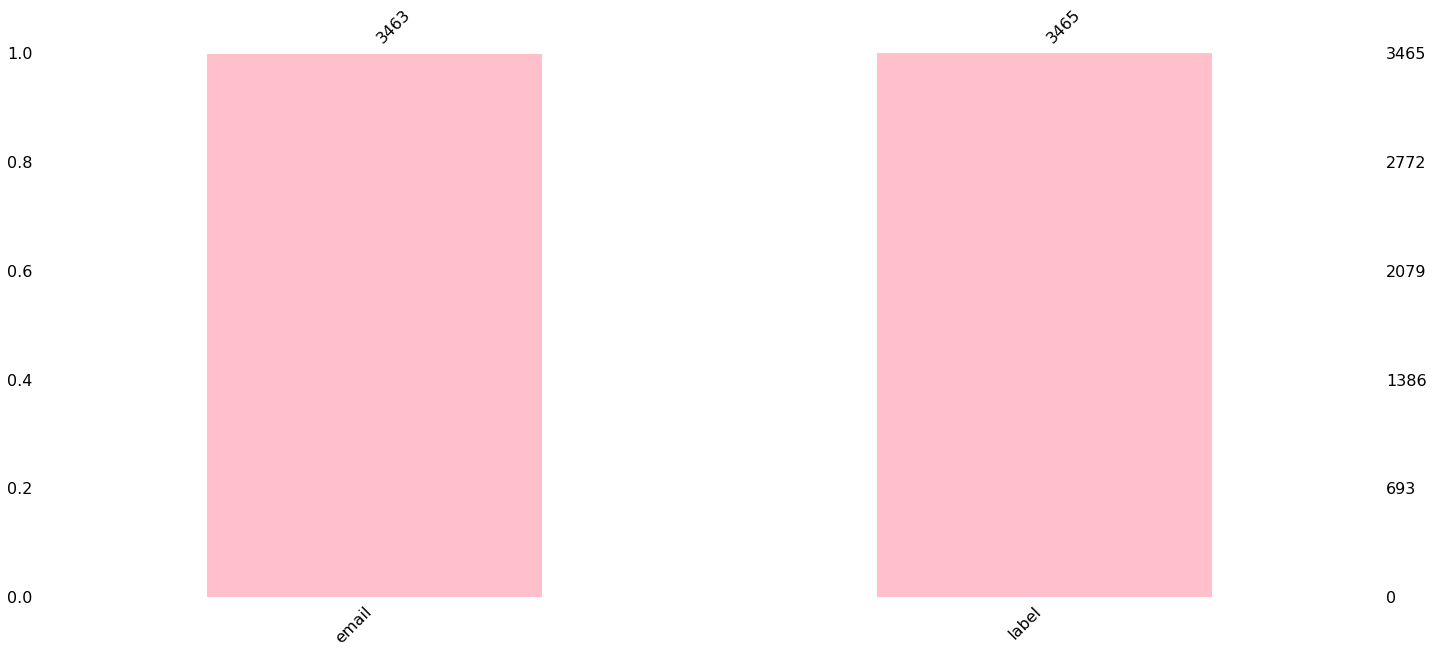

In [ ]:
import missingno as no
no.bar(df, color='pink')

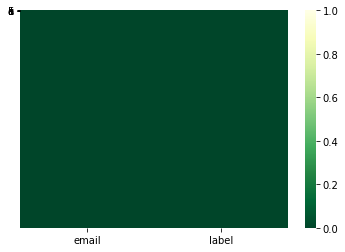

In [ ]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlGn_r')

In [ ]:
df = df.dropna()

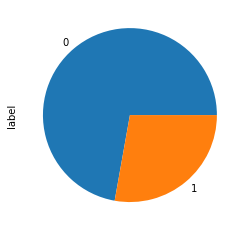

In [ ]:
df.label.value_counts().plot(kind ='pie')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


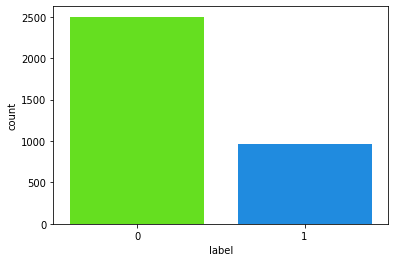

In [ ]:
sns.countplot(df.label, palette='gist_rainbow')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


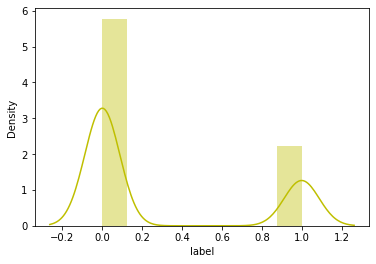

In [ ]:
sns.distplot(df['label'], color='y')
plt.show()

# Splitting the Data into Dependent and Indpendent variables

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer('english')

In [ ]:
x = df['email']
X = tfidf.fit_transform(x)
y = df['label']

# Training and Testing the Data

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# Multiomial Naive Bayes Classifier

In [ ]:
mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Prediction

In [ ]:
ypred_train = mnb.predict(Xtrain)
ypred_test = mnb.predict(Xtest)

## Confusion Matrix

In [ ]:
cm = confusion_matrix(ytest, ypred)
cm

array([[441, 177],
       [185,  63]])

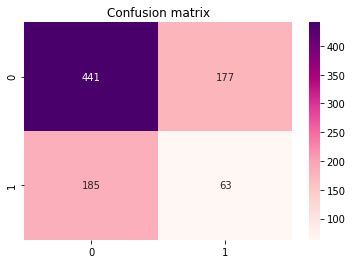

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdPu" ,fmt='g')
plt.title('Confusion matrix', y=5.1)
plt.show()

## Accuracy

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 94.33962264150944
Accuracy of testing data: 92.49422632794457


# Decission Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction

In [ ]:
ypred_train = dt.predict(Xtrain)
ypred_test = dt.predict(Xtest)

## Confusion Matrix

In [ ]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[602,   5],
       [ 16, 243]])

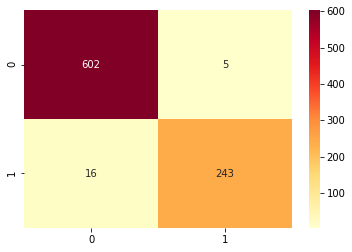

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')


## Accuracy

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 100.0
Accuracy of testing data: 97.57505773672055


[Text(193.15384615384616, 190.26, 'X[5129] <= 0.001\ngini = 0.399\nsamples = 2597\nvalue = [1882, 715]'),
 Text(103.01538461538462, 135.9, 'X[22452] <= 0.018\ngini = 0.267\nsamples = 2202\nvalue = [1852, 350]'),
 Text(51.50769230769231, 81.53999999999999, 'X[13419] <= 0.016\ngini = 0.167\nsamples = 1937\nvalue = [1759, 178]'),
 Text(25.753846153846155, 27.180000000000007, 'gini = 0.131\nsamples = 1892\nvalue = [1759, 133]'),
 Text(77.26153846153846, 27.180000000000007, 'gini = 0.0\nsamples = 45\nvalue = [0, 45]'),
 Text(154.52307692307693, 81.53999999999999, 'X[21202] <= 0.002\ngini = 0.456\nsamples = 265\nvalue = [93, 172]'),
 Text(128.76923076923077, 27.180000000000007, 'gini = 0.455\nsamples = 134\nvalue = [87, 47]'),
 Text(180.27692307692308, 27.180000000000007, 'gini = 0.087\nsamples = 131\nvalue = [6, 125]'),
 Text(283.2923076923077, 135.9, 'X[9795] <= 0.07\ngini = 0.14\nsamples = 395\nvalue = [30, 365]'),
 Text(257.53846153846155, 81.53999999999999, 'X[6850] <= 0.026\ngini = 0.0

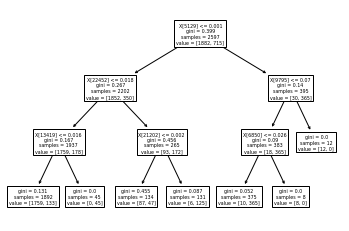

In [ ]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(Xtrain, ytrain)
tree.plot_tree(clf_tree)